In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser #convert time in date time data type

In [2]:
finetech_appdata=pd.read_csv('../input/customers-to-subscription-through-app-behavior/FineTech_appData.csv')

In [3]:
finetech_appdata

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,2013-05-09 13:46:17.871,3,13:00:00,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0
49996,169179,2013-04-09 00:05:17.823,1,00:00:00,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0
49997,302367,2013-02-20 22:41:51.165,2,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0
49998,324905,2013-04-28 12:33:04.288,6,12:00:00,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0


In [4]:
finetech_appdata.shape

(50000, 12)

In [5]:
finetech_appdata.head(6)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
5,56480,2013-04-03 09:58:15.752,2,09:00:00,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,2013-04-03 09:59:03.291,0


In [6]:
finetech_appdata.tail(6)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
49994,90813,2013-02-25 19:35:12.691,0,19:00:00,36,"idscreen,joinscreen,Cycle,product_review,produ...",25,0,0,1,2013-02-25 19:36:56.082,0
49995,222774,2013-05-09 13:46:17.871,3,13:00:00,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0
49996,169179,2013-04-09 00:05:17.823,1,00:00:00,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0
49997,302367,2013-02-20 22:41:51.165,2,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0
49998,324905,2013-04-28 12:33:04.288,6,12:00:00,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0
49999,27047,2012-12-14 01:22:44.638,4,01:00:00,25,"product_review,ScanPreview,VerifyDateOfBirth,V...",26,0,0,0,NaN,1


In [7]:
for i in [1,2,3,4,5,6,7]:
    print(finetech_appdata.loc[i,'screen_list'],'\n')

joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2 

Splash,Cycle,Loan 

product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2 

idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,Institutions,SelectInstitution,BankVerification,ReferralContainer,product_review,product_review2,VerifyCountry,VerifyToken,product_review 

idscreen,Cycle,Home,ScanPreview,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,Loan2,Institutions,product_review,product_review,product_review3 

product_review,product_review2,ScanPreview 

Splash,Cycle,Home,Credit3Container,Credit3Dashboard,Loan2,product_review,product_review2,ScanPreview,VerifyCountry,VerifyPhone,VerifyToken,product_review,product_review,SelectInstitution,BankVerification,TransactionList 



In [8]:
finetech_appdata.isnull().sum()#take summary of null data

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [9]:
finetech_appdata.info()#info about datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [10]:
finetech_appdata.describe()#give destribution of numeric variable

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
#getting unique value
features=finetech_appdata.columns
for i in features:
    print("""Unique value of {}\n{}\nlen is {}\n""".format(i,finetech_appdata[i].unique(),len(finetech_appdata[i].unique())))

Unique value of user
[235136 333588 254414 ... 302367 324905  27047]
len is 49874

Unique value of first_open
['2012-12-27 02:14:51.273' '2012-12-02 01:16:00.905'
 '2013-03-19 19:19:09.157' ... '2013-02-20 22:41:51.165'
 '2013-04-28 12:33:04.288' '2012-12-14 01:22:44.638']
len is 49747

Unique value of dayofweek
[3 6 1 4 2 0 5]
len is 7

Unique value of hour
[' 02:00:00' ' 01:00:00' ' 19:00:00' ' 16:00:00' ' 18:00:00' ' 09:00:00'
 ' 03:00:00' ' 14:00:00' ' 04:00:00' ' 11:00:00' ' 06:00:00' ' 21:00:00'
 ' 05:00:00' ' 17:00:00' ' 20:00:00' ' 00:00:00' ' 22:00:00' ' 10:00:00'
 ' 08:00:00' ' 15:00:00' ' 13:00:00' ' 23:00:00' ' 12:00:00' ' 07:00:00']
len is 24

Unique value of age
[ 23  24  28  31  20  35  26  29  39  32  25  17  21  55  38  27  48  37
  22  36  30  58  40  33  57  19  45  34  46  56  42  43  41  47  18  53
  44  49  60  50  52  62  63  16  54  70  51  69  68  59  76  75  66  61
  72  65  90  64  67  73  77  71  74  89  78  86  80  82  79  87  81  85
 101  88  83 100  84  9

In [12]:
finetech_appdata['age'].value_counts()

23     2348
25     2339
26     2301
24     2298
22     2222
       ... 
89        2
79        1
101       1
88        1
98        1
Name: age, Length: 78, dtype: int64

In [13]:
finetech_appdata.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [14]:
finetech_appdata['hour']=finetech_appdata.hour.str.slice(1,3).astype(int)

In [15]:
finetech_appdata.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked'],
      dtype='object')

In [16]:
finetech_appdata2=finetech_appdata.drop(['user','first_open','screen_list','enrolled_date'],axis=1)

In [17]:
finetech_appdata2

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1
...,...,...,...,...,...,...,...,...
49995,3,13,32,13,0,0,1,0
49996,1,0,35,4,0,1,0,0
49997,2,22,39,25,0,0,0,0
49998,6,12,27,26,0,0,1,0


In [18]:
finetech_appdata2.head(6) #head of dropped data

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1
5,2,9,20,14,0,0,1,0


# Data Visualization

Text(0.5, 1.0, 'Heatmap using correlation matrix of finetech_appdata2')

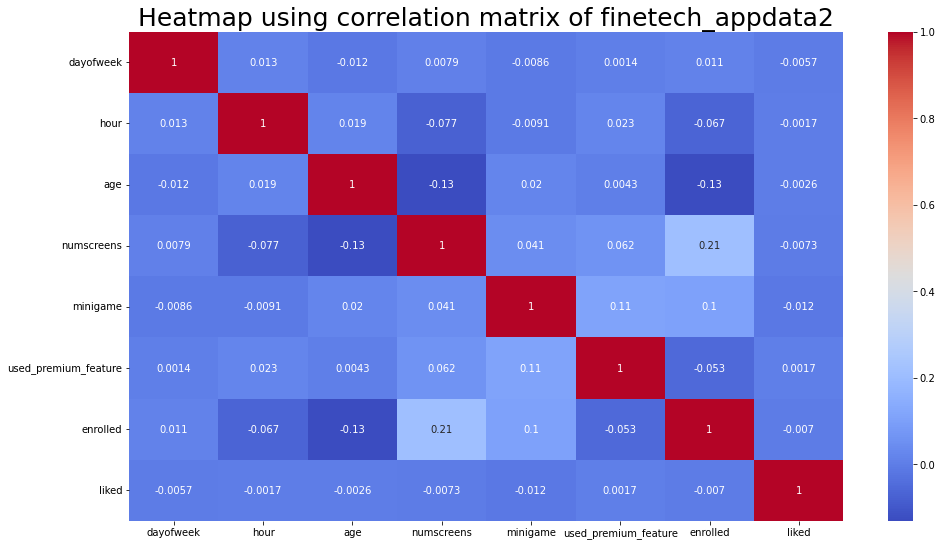

In [19]:
#heatmap
plt.figure(figsize=(16,9))
sns.heatmap(finetech_appdata2.corr(),annot=True,cmap='coolwarm')
plt.title('Heatmap using correlation matrix of finetech_appdata2',fontsize=25)

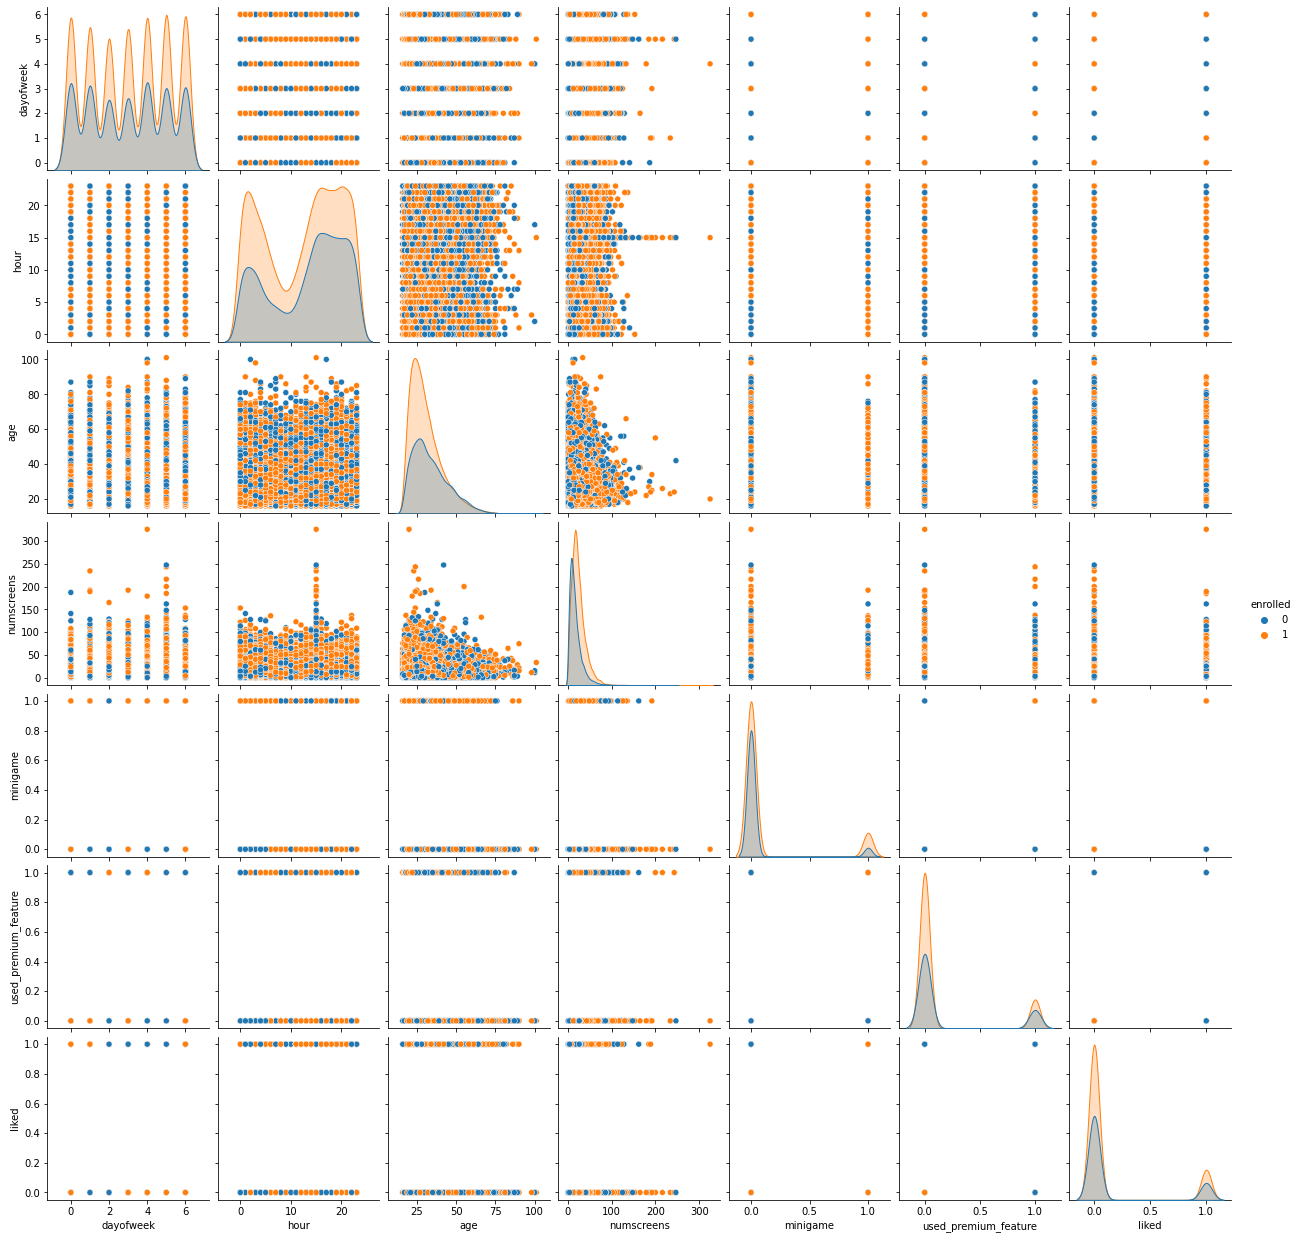

In [20]:
sns.pairplot(finetech_appdata2,hue='enrolled');

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='enrolled', ylabel='count'>

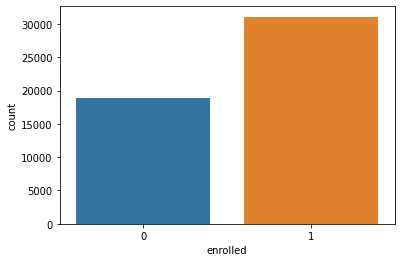

In [21]:
sns.countplot(finetech_appdata.enrolled)

In [22]:
print('Not Enrolled Users=',(finetech_appdata.enrolled <1).sum(),'out of 50000')
print('Enrolled Users=',50000-(finetech_appdata.enrolled <1).sum(),'out of 50000')

Not Enrolled Users= 18926 out of 50000
Enrolled Users= 31074 out of 50000


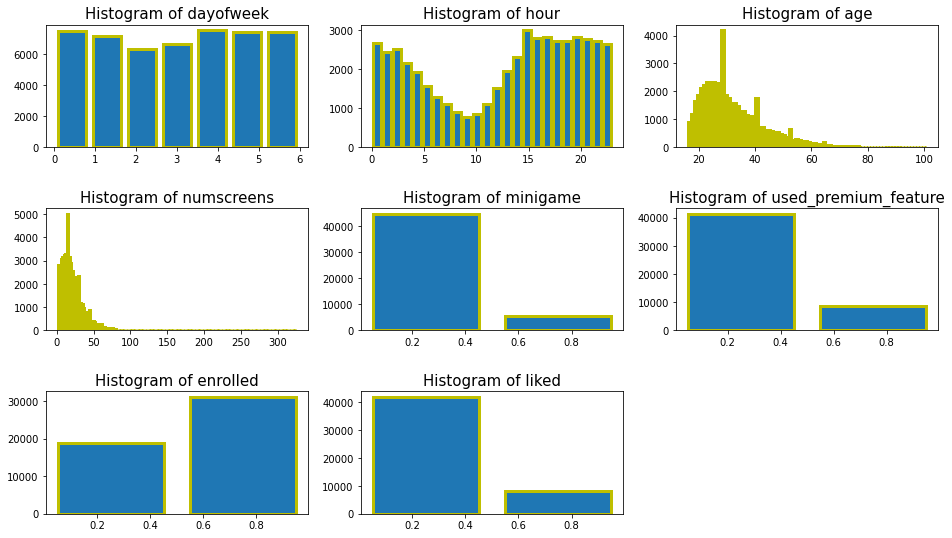

In [23]:
plt.figure(figsize=(16,9))
features=finetech_appdata2.columns
for i,j in enumerate(features):
    plt.subplot(3,3,i+1)
    plt.title('Histogram of {}'.format(j),fontsize=15)
    bins=len(finetech_appdata2[j].unique())
    plt.hist(finetech_appdata2[j],bins=bins,rwidth=0.8,edgecolor='y',linewidth=3,)
plt.subplots_adjust(hspace=0.5)

In [24]:
for i,j in enumerate(features):
    print(i,j)

0 dayofweek
1 hour
2 age
3 numscreens
4 minigame
5 used_premium_feature
6 enrolled
7 liked


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


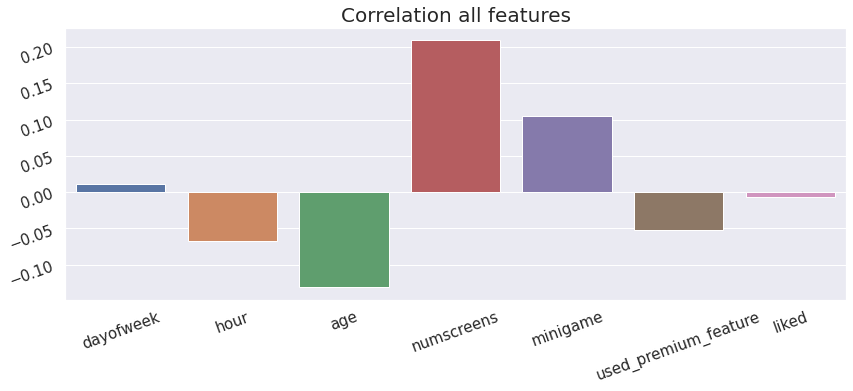

In [25]:
sns.set()
plt.figure(figsize=(14,5))
plt.title('Correlation all features',fontsize=20)
finetech_appdata3=finetech_appdata2.drop(['enrolled'],axis=1)
ax=sns.barplot(finetech_appdata3.columns,finetech_appdata3.corrwith(finetech_appdata2.enrolled))
ax.tick_params(labelsize=15,labelrotation=20,color='k')

In [26]:
finetech_appdata['first_open']=[parser.parse(i) for i in finetech_appdata['first_open']]

In [27]:
finetech_appdata['enrolled_date']=[parser.parse(i) if isinstance(i,str) else i for i in finetech_appdata['enrolled_date']]

In [28]:
finetech_appdata.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [29]:
finetech_appdata['time_to_enrolled']=(finetech_appdata.enrolled_date - finetech_appdata.first_open).astype('timedelta64[h]')

(array([2.8195e+04, 1.0320e+03, 5.6700e+02, 4.2500e+02, 2.8800e+02,
        1.7900e+02, 1.6500e+02, 9.7000e+01, 1.0400e+02, 2.2000e+01]),
 array([   0. ,  543.4, 1086.8, 1630.2, 2173.6, 2717. , 3260.4, 3803.8,
        4347.2, 4890.6, 5434. ]),
 <BarContainer object of 10 artists>)

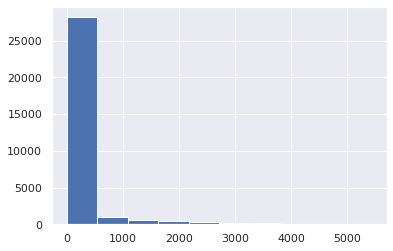

In [30]:
plt.hist(finetech_appdata['time_to_enrolled'].dropna())

(array([22793.,   755.,   707.,   288.,   347.,   210.,   187.,   212.,
          135.,   194.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

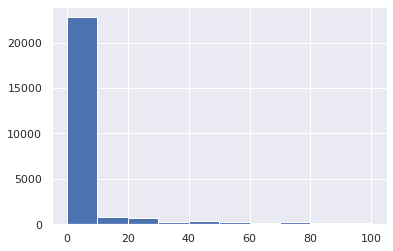

In [31]:
plt.hist(finetech_appdata['time_to_enrolled'].dropna(),range=(0,100))

In [32]:
finetech_appdata.loc[finetech_appdata.time_to_enrolled > 48 ,'enrolled']=0

In [33]:
finetech_appdata

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,time_to_enrolled
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,2013-05-09 13:46:17.871,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0,0.0
49996,169179,2013-04-09 00:05:17.823,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaT,0,NaN
49997,302367,2013-02-20 22:41:51.165,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaT,0,NaN
49998,324905,2013-04-28 12:33:04.288,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0,0.0


In [34]:
finetech_appdata.drop(columns=['time_to_enrolled','enrolled_date','first_open'],inplace=True)

In [35]:
finetech_appdata

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,0
49996,169179,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,0
49997,302367,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,0
49998,324905,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,0


In [36]:
finetech_app_screen_data=pd.read_csv('../input/customers-to-subscription-through-app-behavior/top_screens.csv').top_screens.values

In [37]:
finetech_app_screen_data

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [38]:
type(finetech_app_screen_data)

numpy.ndarray

In [39]:
finetech_appdata['screen_list']=finetech_appdata.screen_list.astype(str) +','

In [40]:
finetech_appdata

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan,",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,0
49996,169179,1,0,35,"Cycle,Splash,Home,RewardsContainer,",4,0,1,0,0
49997,302367,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,0
49998,324905,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,0


In [41]:
for screen_name in finetech_app_screen_data:
    finetech_appdata[screen_name]=finetech_appdata.screen_list.str.contains(screen_name).astype(int)
    finetech_appdata['screen_list']= finetech_appdata.screen_list.str.replace(screen_name+",","")

In [42]:
finetech_appdata.screen_list.str.contains('Splash').astype(int)

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: screen_list, Length: 50000, dtype: int64

In [43]:
finetech_appdata.screen_list.str.replace('splash'+",","")

0        joinscreen,product_review,ScanPreview,VerifyTo...
1        joinscreen,product_review,product_review2,Scan...
2                                                         
3        product_review,Home,product_review,ReferralCon...
4        joinscreen,ScanPreview,VerifySSN,Home,SelectIn...
                               ...                        
49995    Home,ScanPreview,VerifySSN,product_review,prod...
49996                                                Home,
49997    joinscreen,product_review,product_review2,Scan...
49998    Home,product_review,product_review,product_rev...
49999    product_review,ScanPreview,ProfileVerifySSN,Pr...
Name: screen_list, Length: 50000, dtype: object

In [44]:
finetech_appdata.head(6)

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,254414,1,19,23,,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,56480,2,9,20,"Home,ScanPreview,VerifySSN,product_review,prod...",14,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
finetech_appdata.loc[0,'screen_list']

'joinscreen,product_review,ScanPreview,VerifyToken,ProfileVerifySSN,Settings,ForgotPassword,'

In [46]:
finetech_appdata['remain_screen_list']=finetech_appdata.screen_list.str.count(",")

In [47]:
finetech_appdata.drop(columns=['screen_list'],inplace=True)

In [48]:
finetech_appdata

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,6
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49997,302367,2,22,39,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
49998,324905,6,12,27,26,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,13


In [49]:
finetech_appdata.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

In [50]:
saving_screens=['Saving1',
               'Saving2',
               'Saving2Amount',
               'Saving4',
               'Saving5',
               'Saving6',
               'Saving7',
               'Saving8',
               'Saving9',
               'Saving10'
               ]
finetech_appdata['saving_screen_count']=finetech_appdata[saving_screens].sum(axis=1)
finetech_appdata.drop(columns= saving_screens, inplace=True)

In [51]:
finetech_appdata

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screen_count
0,235136,3,2,23,15,0,0,0,0,1,...,0,0,0,0,0,0,0,0,7,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,5,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,6,0
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,0,1,0,0,0,0,0,0,6,0
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
49997,302367,2,22,39,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,0
49998,324905,6,12,27,26,0,0,1,0,0,...,0,0,0,0,0,0,0,0,13,0


In [52]:
credit_screens=['Credit1',
                'Credit2',
                'Credit3',
                'Credit3Container',
                'Credit3Dashboard',
               ]
finetech_appdata['credit_screens_count']=finetech_appdata[credit_screens].sum(axis=1)
finetech_appdata.drop(columns=credit_screens,axis=1,inplace=True)

In [53]:
finetech_appdata

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screen_count,credit_screens_count
0,235136,3,2,23,15,0,0,0,0,1,...,0,0,0,0,0,0,0,7,0,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,5,0,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,6,0,3
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,10,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,1,0,0,0,0,0,0,6,0,2
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
49997,302367,2,22,39,25,0,0,0,0,0,...,0,0,0,0,0,0,0,6,0,0
49998,324905,6,12,27,26,0,0,1,0,0,...,0,0,0,0,0,0,0,13,0,0


In [54]:
cc_screens=['CC1',
           'CC1Category',
           'CC3',
           ]
finetech_appdata['cc_screens_count']=finetech_appdata[cc_screens].sum(axis=1)
finetech_appdata.drop(columns=cc_screens,inplace=True)

In [55]:
finetech_appdata

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screen_count,credit_screens_count,cc_screens_count
0,235136,3,2,23,15,0,0,0,0,1,...,0,0,0,0,0,0,7,0,0,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,5,0,0,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,6,0,3,0
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,10,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,0,0,0,0,0,0,6,0,2,0
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
49997,302367,2,22,39,25,0,0,0,0,0,...,0,0,0,0,0,0,6,0,0,0
49998,324905,6,12,27,26,0,0,1,0,0,...,0,0,0,0,0,0,13,0,0,0


In [56]:
loan_screens=['Loan',
             'Loan2',
             'Loan3',
             'Loan4',
             ]
finetech_appdata['loan_screens_count']=finetech_appdata[loan_screens].sum(axis=1)
finetech_appdata.drop(columns=loan_screens,inplace=True)

In [57]:
finetech_appdata

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screen_count,credit_screens_count,cc_screens_count,loan_screens_count
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,0,0,0,0,0,6,0,2,0,0
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
49997,302367,2,22,39,25,0,0,0,0,1,...,0,0,0,0,0,6,0,0,0,0
49998,324905,6,12,27,26,0,0,1,0,1,...,0,0,0,0,0,13,0,0,0,0


In [58]:
finetech_appdata.shape

(50000, 50)

In [59]:
finetech_appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   user                     50000 non-null  int64
 1   dayofweek                50000 non-null  int64
 2   hour                     50000 non-null  int64
 3   age                      50000 non-null  int64
 4   numscreens               50000 non-null  int64
 5   minigame                 50000 non-null  int64
 6   used_premium_feature     50000 non-null  int64
 7   enrolled                 50000 non-null  int64
 8   liked                    50000 non-null  int64
 9   location                 50000 non-null  int64
 10  Institutions             50000 non-null  int64
 11  VerifyPhone              50000 non-null  int64
 12  BankVerification         50000 non-null  int64
 13  VerifyDateOfBirth        50000 non-null  int64
 14  ProfilePage              50000 non-null  int64
 15  Ve

In [60]:
finetech_appdata.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screen_count,credit_screens_count,cc_screens_count,loan_screens_count
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000,3.000000


<AxesSubplot:>

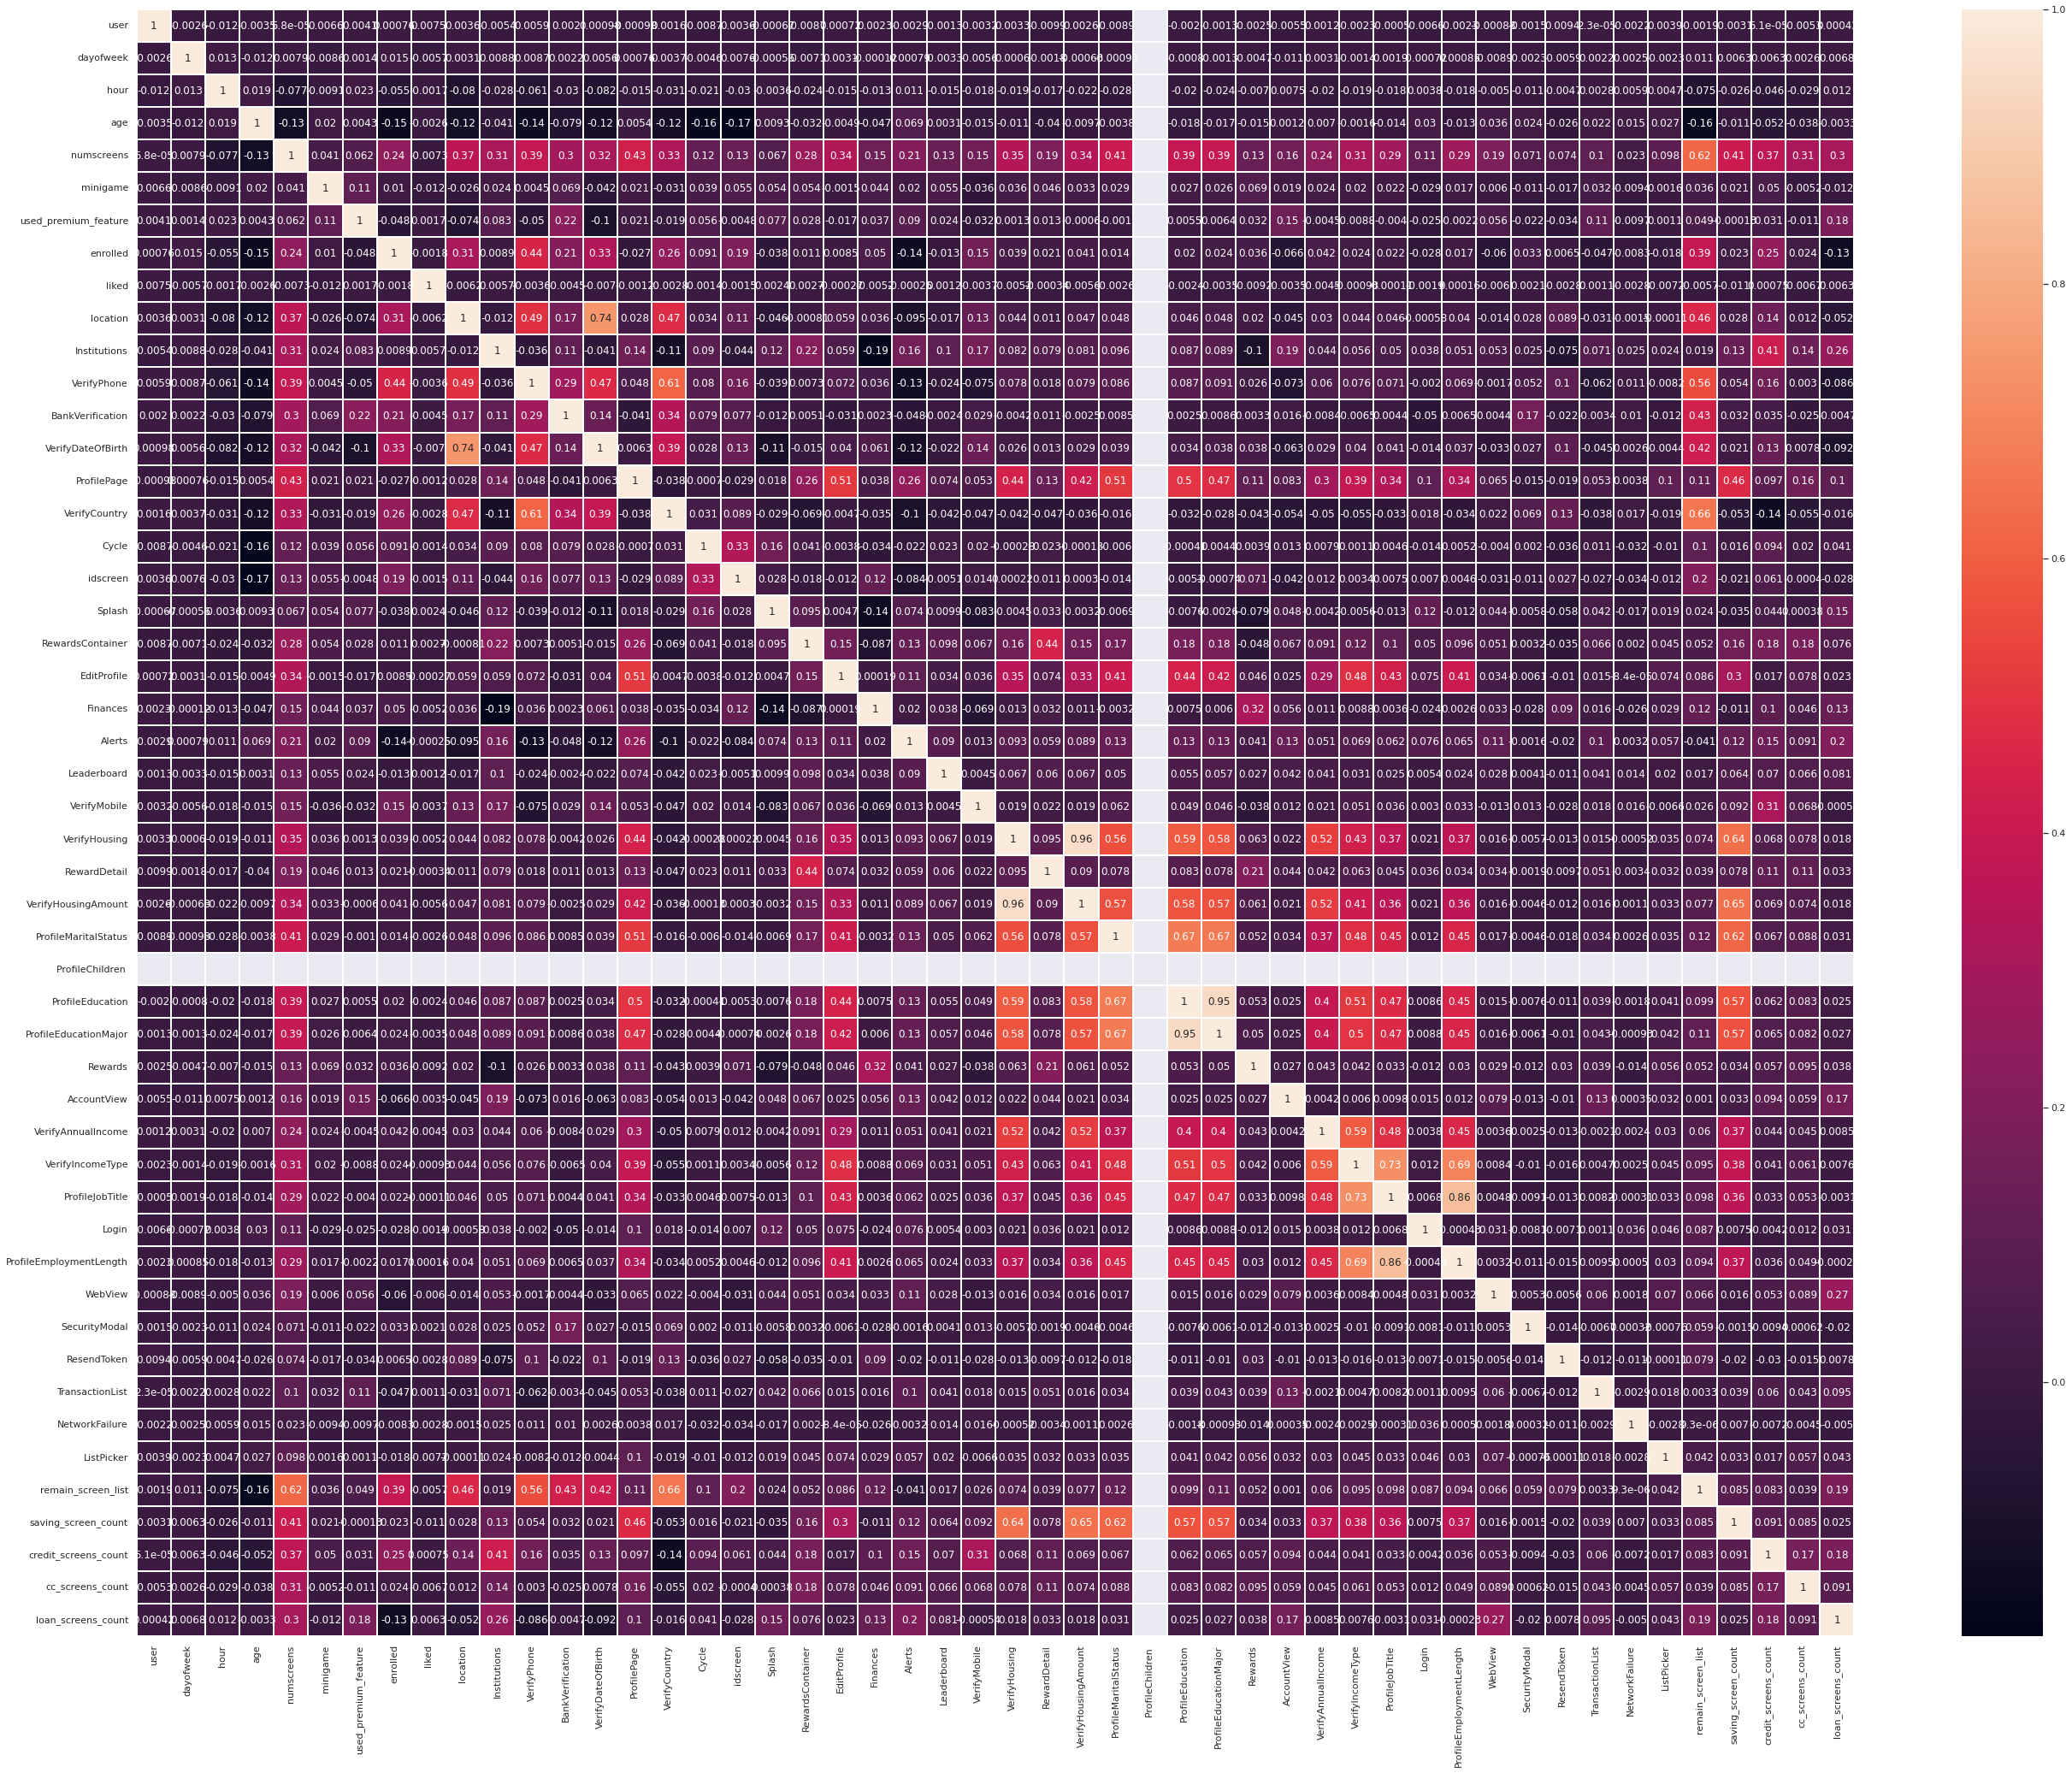

In [61]:
plt.figure(figsize=(45,35))
sns.heatmap(finetech_appdata.corr(),annot=True,linewidth =2)

In [62]:
finetech_appdata.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'remain_screen_list',
       'saving_screen_count', 'credit_screens_count', 'cc_screens_count',
       'loan_screens_count'],
      dtype='object')

In [63]:
finetech_appdata['ProfileChildren '].unique()

array([0])

In [64]:
corr_matrix=finetech_appdata.corr()
corr_matrix['ProfileChildren ']

user                      NaN
dayofweek                 NaN
hour                      NaN
age                       NaN
numscreens                NaN
minigame                  NaN
used_premium_feature      NaN
enrolled                  NaN
liked                     NaN
location                  NaN
Institutions              NaN
VerifyPhone               NaN
BankVerification          NaN
VerifyDateOfBirth         NaN
ProfilePage               NaN
VerifyCountry             NaN
Cycle                     NaN
idscreen                  NaN
Splash                    NaN
RewardsContainer          NaN
EditProfile               NaN
Finances                  NaN
Alerts                    NaN
Leaderboard               NaN
VerifyMobile              NaN
VerifyHousing             NaN
RewardDetail              NaN
VerifyHousingAmount       NaN
ProfileMaritalStatus      NaN
ProfileChildren           NaN
ProfileEducation          NaN
ProfileEducationMajor     NaN
Rewards                   NaN
AccountVie

Data Preprocessing

In [65]:
clean_finetech_appdata=finetech_appdata
target=finetech_appdata['enrolled']
finetech_appdata.drop(columns='enrolled',inplace=True)

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(finetech_appdata,target,test_size=0.2,random_state=0)

In [67]:
train_userID=X_train['user']
X_train.drop(columns='user',inplace=True)
test_userID=X_test['user']
X_test.drop(columns='user',inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Feature Scaling

In [68]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

# Model Building

In [69]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(criterion='entropy',random_state=0)
dt_model.fit(X_train,y_train)
y_pred_dt=dt_model.predict(X_test)
accuracy_score(y_test,y_pred_dt)

0.6936

In [71]:
dt_model2=DecisionTreeClassifier(criterion='entropy',random_state=0)
dt_model2.fit(X_train_sc,y_train)
y_pred_dt_sc=dt_model2.predict(X_test_sc)
accuracy_score(y_test,y_pred_dt_sc)

0.6932

# KNN

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn_model.fit(X_train,y_train)
y_pred_knn=knn_model.predict(X_test)
accuracy_score(y_test,y_pred_knn)

0.6994

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn_model2=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn_model2.fit(X_train,y_train)
y_pred_knn=knn_model.predict(X_test)
accuracy_score(y_test,y_pred_knn)

0.6994

# Naive Bayes

In [74]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model.fit(X_train,y_train)
y_pred_nb=nb_model.predict(X_test)
accuracy_score(y_test,y_pred_nb)

0.7114

In [75]:
nb_model=GaussianNB()
nb_model.fit(X_train,y_train)
y_pred_nb_sc=nb_model.predict(X_test_sc)
accuracy_score(y_test,y_pred_nb_sc)

0.6418

# Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rf_model.fit(X_train,y_train)
y_pred_rf=rf_model.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.7621

In [77]:
from sklearn.ensemble import RandomForestClassifier
rf_model2=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rf_model2.fit(X_train,y_train)
y_pred_rf_sc=rf_model.predict(X_test_sc)
accuracy_score(y_test,y_pred_rf_sc)

0.5503

# Support Vector Machine

In [78]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(X_train,y_train)
y_pred_svc=svc_model.predict(X_test)
accuracy_score(y_test,y_pred_svc)

0.7609

In [79]:
svc_model2=SVC()
svc_model2.fit(X_train,y_train)
y_pred_svc_sc=svc_model.predict(X_test_sc)
accuracy_score(y_test,y_pred_svc_sc)

0.5473

# XGBoost

In [80]:
import sys
print(sys.base_prefix)

/opt/conda


In [81]:
import sys
!{sys.executable} -m pip install xgboost

In [82]:
from xgboost import XGBClassifier
xgb_model=XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred_xgb=xgb_model.predict(X_test)
accuracy_score(y_test,y_pred_xgb)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:29:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.781

In [83]:
xgb_model2=XGBClassifier()
xgb_model2.fit(X_train,y_train)
y_pred_xgb_sc=xgb_model.predict(X_test_sc)
accuracy_score(y_test,y_pred_xgb_sc)

[08:29:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.5917

In [84]:
xgb_model_pt1=XGBClassifier(
learning_rate=0.01,
n_estimators=5000,
max_depth=4,
min_child_weight=6,
gamma=0,
subsample=0.8,
colsample_bytree=0.8,
reg_alpha=0.005,
objective='binary:logistic',
nthread=4,
scale_pos_weight=1,
seed=27    
)
xgb_model_pt1.fit(X_train,y_train)
y_pred_xgb_pt1=xgb_model_pt1.predict(X_test)
accuracy_score(y_test,y_pred_xgb_pt1)

[08:29:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.788

In [85]:
xgb_model_pt2=XGBClassifier(
learning_rate=0.01,
n_estimators=5000,
max_depth=4,
min_child_weight=6,
gamma=0,
subsample=0.8,
colsample_bytree=0.8,
reg_alpha=0.005,
objective='binary:logistic',
nthread=4,
scale_pos_weight=1,
seed=27    
)
xgb_model_pt2.fit(X_train,y_train)
y_pred_xgb_sc_pt2=xgb_model_pt1.predict(X_test)
accuracy_score(y_test,y_pred_xgb_sc_pt2)

[08:31:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.788

Text(0.5, 1.0, 'Confusion Matrix')

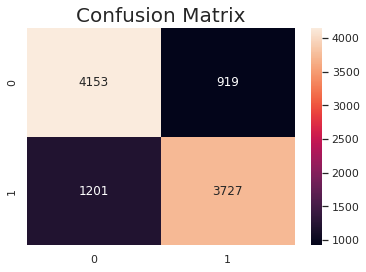

In [86]:
#confusion Matrix
cm_xgb_pt2=confusion_matrix(y_test,y_pred_xgb_sc_pt2)
sns.heatmap(cm_xgb_pt2, annot=True ,fmt='g')
plt.title('Confusion Matrix',fontsize=20)

In [87]:
#classification report
cr_xgb_pt2=classification_report(y_test,y_pred_xgb_sc_pt2)
print('Classification report\n',cr_xgb_pt2)

Classification report
               precision    recall  f1-score   support

           0       0.78      0.82      0.80      5072
           1       0.80      0.76      0.78      4928

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



In [88]:
#cross validation
from sklearn.model_selection import cross_val_score
cross_validation=cross_val_score(estimator=xgb_model_pt2, X=X_train_sc, y=y_train,cv=10)
print('Cross Validation od Xgboost model=',cross_validation)
print('Cross Validation od Xgboost model(in mean)=',cross_validation.mean())

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:34:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:36:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:39:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:41:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [89]:
final_result=pd.concat([test_userID,y_test],axis=1)
final_result['predicted result']=y_pred_xgb_sc_pt2

final_result

,user,enrolled,predicted result
11841,239786,1,1
19602,279644,1,1
45519,98290,0,0
25747,170150,1,1
42642,237568,1,0
...,...,...,...
25091,143036,1,1
27853,91158,1,1
47278,248318,0,0
37020,142418,1,1


In [90]:
final_result.head(6)

,user,enrolled,predicted result
11841,239786,1,1
19602,279644,1,1
45519,98290,0,0
25747,170150,1,1
42642,237568,1,0
31902,65042,1,0


# Saving the Model

In [91]:
#pickle
import pickle

pickle.dump(xgb_model_pt2,open('model_finetech.pickle','wb'))

ml_load_pl=pickle.load(open('model_finetech.pickle','rb'))

y_pred_pl =ml_load_pl.predict(X_test_sc)

cm_pl=confusion_matrix(y_test,y_pred_pl)
print('Confusion Matrix=\n',cm_pl)

print('Accuracy of Model =',accuracy_score(y_test,y_pred_pl))

Confusion Matrix=
 [[4739  333]
 [3821 1107]]
Accuracy of Model = 0.5846


In [92]:
import joblib

joblib.dump(xgb_model_pt2,'model_finetech.joblib')

ml_model_jl=joblib.load('model_finetech.joblib')

y_pred_jl=ml_model_jl.predict(X_test_sc)

cm_jl=confusion_matrix(y_test,y_pred_jl)

print('Confusion Matrix =\n',cm_jl)

print('Accuracy Model=\n',accuracy_score(y_test,y_pred_jl))

Confusion Matrix =
 [[4739  333]
 [3821 1107]]
Accuracy Model=
 0.5846
